# Question-1

In [4]:
import pydicom as dicom
import matplotlib.pylab as plt
import numpy as np
import os
import cv2

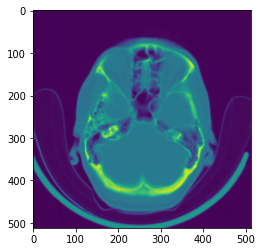

In [2]:
image_path = 'given-files/ID_0002a616e.dcm'

RESULTS_DIR = "results/"

os.makedirs(RESULTS_DIR, exist_ok=True)

ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array)

True

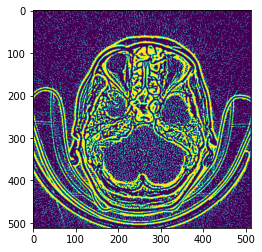

In [5]:
mean_kernel = (1/9) * np.asarray([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

def image_filtering(img, kernel):
    new_img = img.copy()
    
    row, col = img.shape
    k_row, k_col = kernel.shape
    
    for i in range(row):
        for j in range(col):
            
            new_pix = 0
            for x in range(k_row):
                for y in range(k_col):
                    k_i = i - k_row//2 + x
                    k_j = j - k_col//2 + y
                    
                    if k_i < 0 or k_i >= row or k_j < 0 or k_j >= col:
                        continue
                        
                    new_pix += img[k_i][k_j] * kernel[x][y]
                    
            new_img[i][j] = new_pix
            
    return new_img
                    
                        
blurred_img = image_filtering(ds.pixel_array, mean_kernel)
sharpened_img = ds.pixel_array - blurred_img

plt.imshow(sharpened_img)
save_path = os.path.join(RESULTS_DIR, "sharpedned_dicom_image.jpg")
cv2.imwrite(save_path, sharpened_img)

# Question-3

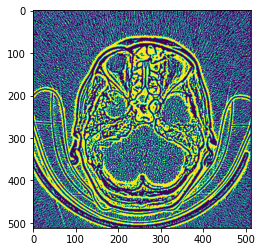

In [6]:
edge_detection_kernel = (1/4) * np.asarray([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

def edge_detected_image(img, kernel):
    new_img = img.copy()
    
    row, col = img.shape
    k_row, k_col = kernel.shape
    
    for i in range(row):
        for j in range(col):
            
            new_pix = 0
            for x in range(k_row):
                for y in range(k_col):
                    k_i = i - k_row//2 + x
                    k_j = j - k_col//2 + y
                    
                    if k_i < 0 or k_i >= row or k_j < 0 or k_j >= col:
                        continue
                        
                    new_pix += img[k_i][k_j] * kernel[x][y]
                    
            new_img[i][j] = new_pix
            
    plt.imshow(new_img)
    save_path = os.path.join(RESULTS_DIR, "edge_detected_dicom_image.jpg")
    cv2.imwrite(save_path, new_img)
                    
                        
edge_detected_image(ds.pixel_array, edge_detection_kernel)

# Observations from Q1 & Q2 Results

From the observations:
    1. edge_detected_dicom_image.jpg
    2. sharpedned_dicom_image.jpg
    
* sharpedned_dicom_image.jpg has removed noises from the regions (no mean pixel values). Therefore, it has edges 
and contrastive regions more vibrant.

* edge_detected_dicom_image.jpg is showing the edges same as the sharpedned_dicom_image.jpg. However, the other regions has noisy pixels too. When we look at the background of skull, there are slat and pepper noises everywhere, and they were not removed in the edge detection processing.
